# Explore here

In [152]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from pickle import dump

In [131]:
df = pd.read_csv("https://raw.githubusercontent.com/rosinni/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=';')
df.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [132]:
df.shape

(1599, 12)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [134]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [135]:
def quality_to_label(q):
    if q <= 4:
        return 0  #
    elif q <= 6:
        return 1
    else:
        return 2

df['label'] = df['quality'].apply(quality_to_label)

In [136]:
df["label"].value_counts()

label
1    1319
2     217
0      63
Name: count, dtype: int64

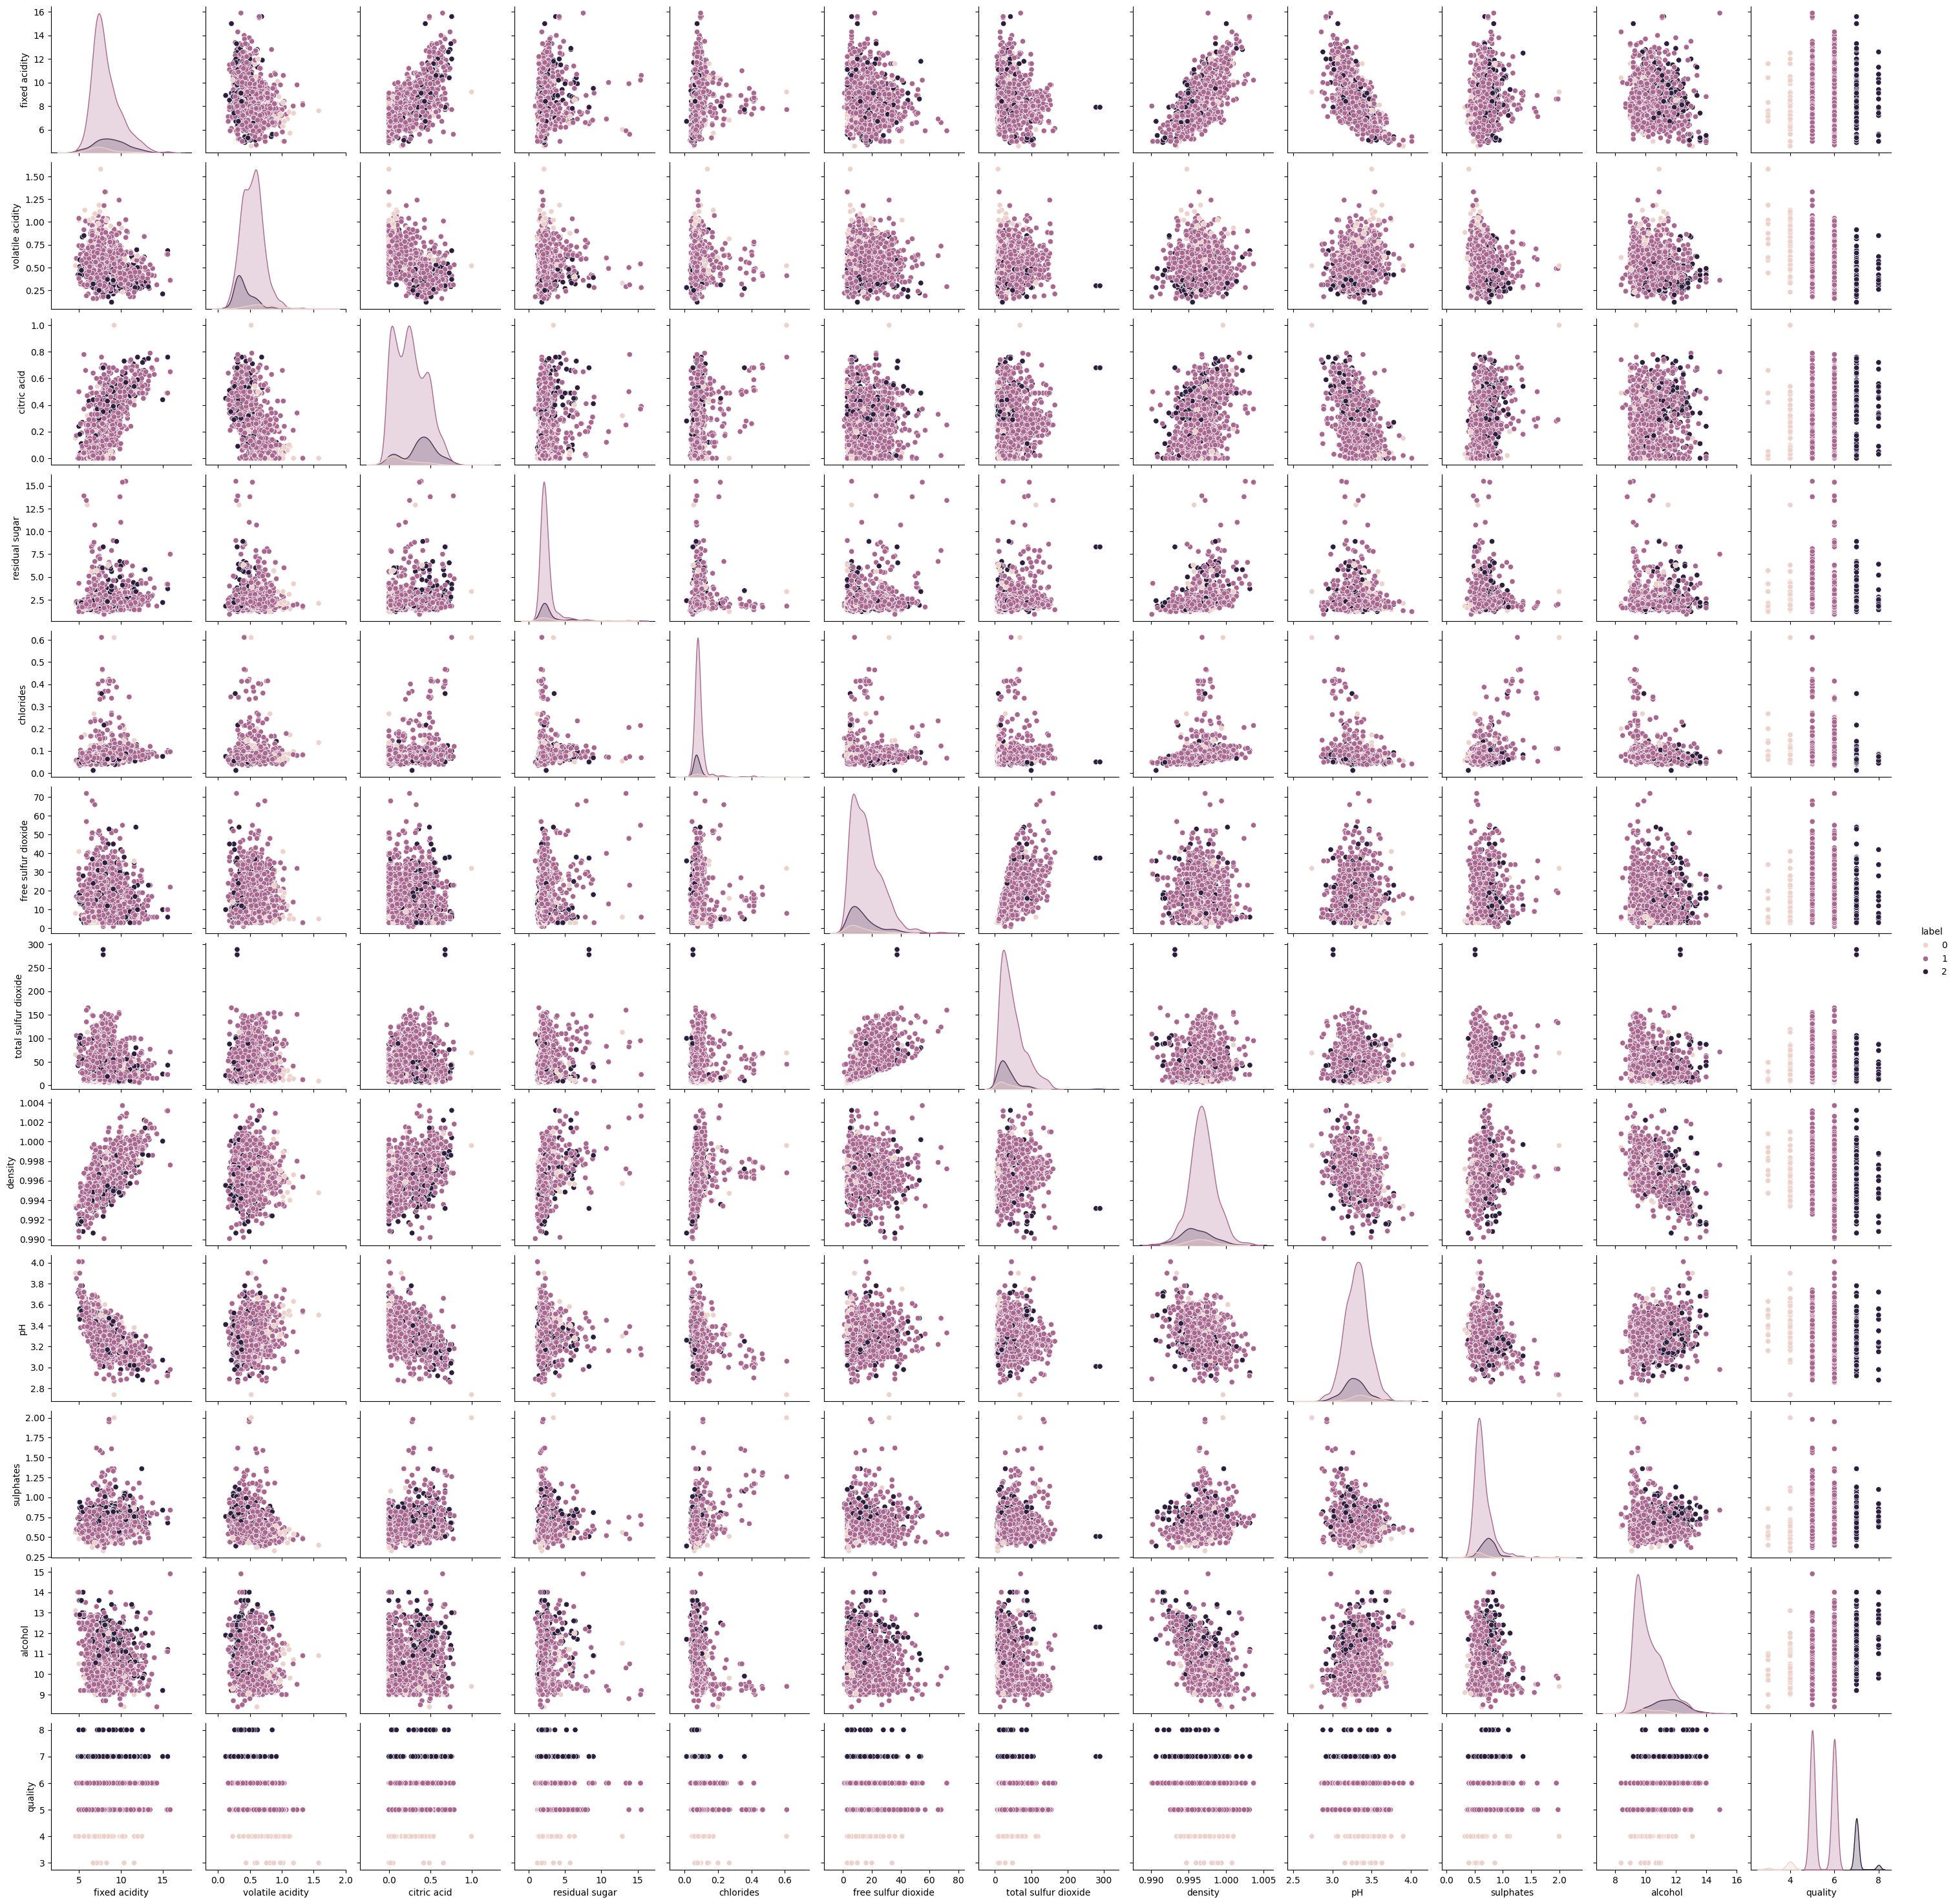

In [137]:
sns.pairplot(df, vars=df.columns[:-1], hue='label')
plt.show()

In [138]:
df.describe()

fixed acidity  volatile acidity  ...      quality        label
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...     5.636023     1.096310
std         1.741096          0.179060  ...     0.807569     0.407354
min         4.600000          0.120000  ...     3.000000     0.000000
25%         7.100000          0.390000  ...     5.000000     1.000000
50%         7.900000          0.520000  ...     6.000000     1.000000
75%         9.200000          0.640000  ...     6.000000     1.000000
max        15.900000          1.580000  ...     8.000000     2.000000

[8 rows x 13 columns]

In [139]:
X = df.drop(["label", "quality"], axis = 1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [140]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [141]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [142]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,

In [143]:
accuracy_score(y_test, y_pred)

0.84375

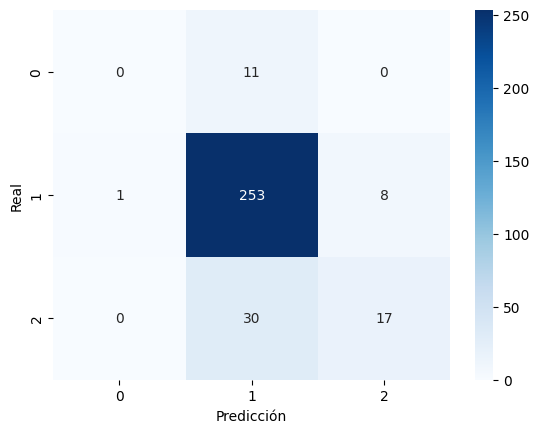

In [144]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [145]:
cr = classification_report(y_test, y_pred)
print("Reporte de clasificación:\n", cr)

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      0.97      0.91       262
           2       0.68      0.36      0.47        47

    accuracy                           0.84       320
   macro avg       0.51      0.44      0.46       320
weighted avg       0.80      0.84      0.81       320



# Optimización del Modelo

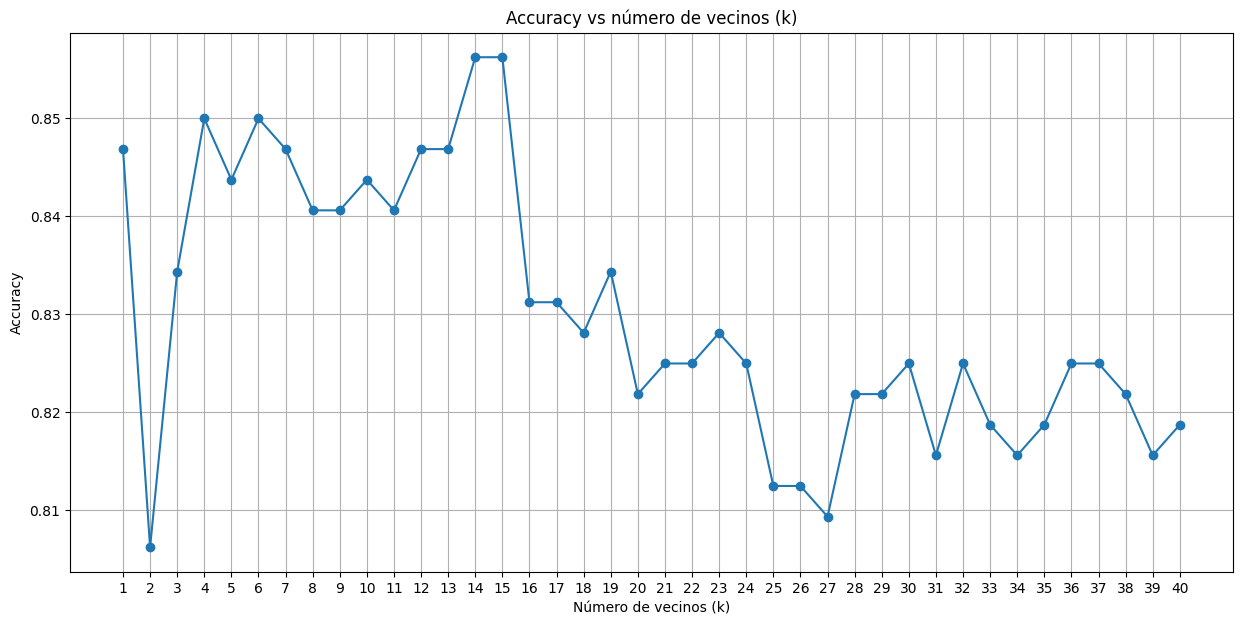

El mejor valor de k es: 14 con accuracy: 0.8562


In [ ]:
accuracies = []

for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(15,7))
plt.plot(range(1, 41), accuracies, marker='o')
plt.title('Accuracy vs número de vecinos (k)')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1,41))
plt.grid(True)
plt.show()

best_k = accuracies.index(max(accuracies)) + 1
print(f"El mejor valor de k es: {best_k} con accuracy: {max(accuracies):.4f}")

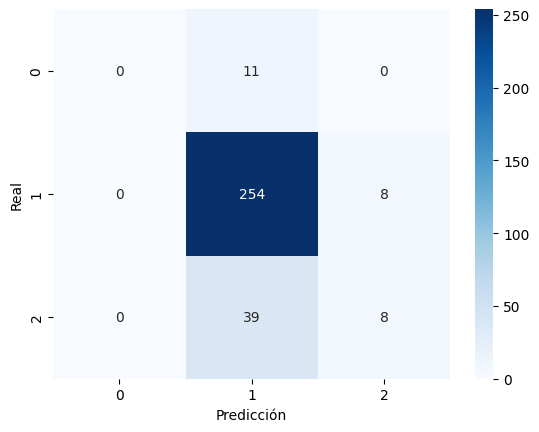

In [147]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [148]:
cr = classification_report(y_test, y_pred)
print("Reporte de clasificación:\n", cr)

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.84      0.97      0.90       262
           2       0.50      0.17      0.25        47

    accuracy                           0.82       320
   macro avg       0.45      0.38      0.38       320
weighted avg       0.76      0.82      0.77       320



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Paso final

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

def predict_wine_quality(features):

    data = np.array(features).reshape(1, -1)
    
    data_scaled = scaler.transform(data)
    
    pred = best_knn.predict(data_scaled)[0]
    
    if pred == 0:
        return "Este vino probablemente sea de baja calidad 🍷"
    elif pred == 1:
        return "Este vino probablemente sea de calidad media 🍷"
    else:
        return "Este vino probablemente sea de alta calidad 🍷"

In [151]:
#Podemos probar con cualquier valor
print(predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]))

Este vino probablemente sea de calidad media 🍷


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [153]:
#Guardamos el modelo
dump(best_knn, open("../models/modelo_optimo_14_42.sav", "wb"))